In [12]:
import matplotlib.pyplot as plt 
import pickle 
import numpy as np 

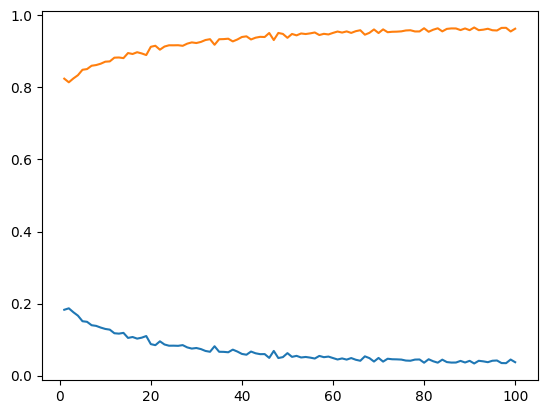

In [16]:
# Load discriminator results for real and fake data 
with open('saved_losses/gan_dis_fake_arr.pkl', 'rb') as f:
    gan_dis_fake_arr = pickle.load(f)
with open('saved_losses/gan_dis_real_arr.pkl', 'rb') as f:
    gan_dis_real_arr = pickle.load(f)
epochs = np.arange(0.0, 100.0) + 1.0
gan_dis_fake_arr = np.array(gan_dis_fake_arr)
gan_dis_real_arr = np.array(gan_dis_real_arr)

plt.plot(epochs, gan_dis_fake_arr)
plt.plot(epochs, gan_dis_real_arr)

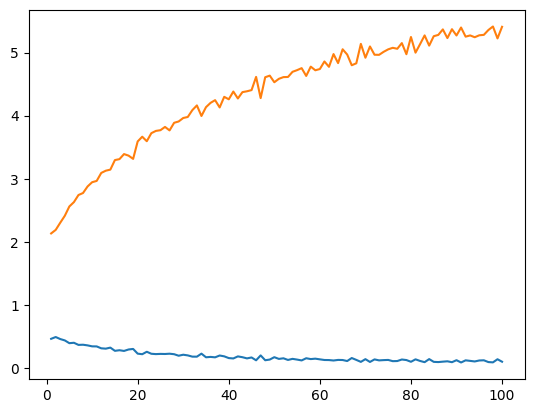

In [17]:
# Load loss of discriminator and generator for GAN 
with open('saved_losses/gan_dis_loss_arr.pkl', 'rb') as f:
    gan_dis_fake_arr = pickle.load(f)
with open('saved_losses/gan_gen_loss_arr.pkl', 'rb') as f:
    gan_gen_loss_arr = pickle.load(f)
epochs = np.arange(0.0, 100.0) + 1.0
gan_dis_fake_arr = np.array(gan_dis_fake_arr)
gan_gen_loss_arr = np.array(gan_gen_loss_arr)

plt.plot(epochs, gan_dis_fake_arr)
plt.plot(epochs, gan_gen_loss_arr)